<a href="https://colab.research.google.com/github/JDLiu/DigitalImageProcessAtNCHU/blob/main/PerspectiveTransformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perspective Transformation

In [ ]:
#掛載Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import os
from skimage import io
from matplotlib import pyplot as plt
from math import fabs
%matplotlib inline
figsize = (8,18)

In [ ]:
#切換預設目錄
SYS_DIR = "/content/drive/My Drive/Colab Notebooks/DIP"
if not os.path.isdir(SYS_DIR):
    os.mkdir(SYS_DIR)
os.chdir(SYS_DIR)

In [ ]:
#繪圖
def plots(img):
    plt.figure(figsize=figsize)
    plt.imshow(img)
#讀檔
def read_img(path):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

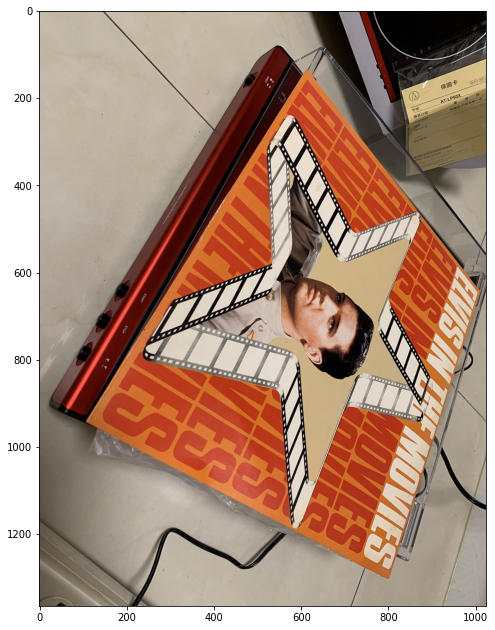

In [ ]:
#讀出原圖
img = read_img('1609399332423.jpg')
#img = read_img('yy.jpg')
#用小畫家標記四個點
original_points=[[611,145],[1011,645],[109,945],[803,1301]];
#original_points=[[734,500],[829,517],[716,627],[802,645]];
plots(img)

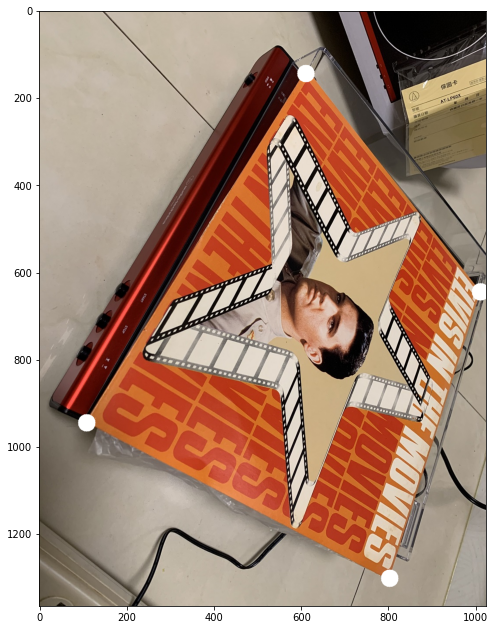

In [ ]:
#標記四個點看效果
img_points = img.copy()
for p in original_points:
    cv2.circle(img_points, center=tuple(p), radius=20, color=(255,255,255), thickness=-1)
plots(img_points)

In [ ]:
MAX = 8
MATRIX_REF = np.zeros((MAX, MAX), dtype=np.float64)
rl = list(np.array(original_points).flatten())

In [ ]:
#定義高斯消去
def gauss():
    i=0
    j=0
    k=0
    s=0
    r=0.0
    u=0.0
    temp= 0.0
    l = np.zeros((MAX, MAX), dtype=np.float64)

    for k in range(MAX - 1):
        s = k
        r = fabs(MATRIX_REF[k, k])

        for i in range(k, MAX):
            if r < fabs(MATRIX_REF[i, k]):
                r = fabs(MATRIX_REF[i, k])
                s = i
        if s != k:
            MATRIX_REF[[k, s]] = MATRIX_REF[[s, k]]  # exchange
            temp = rl[k]
            rl[k] = rl[s]
            rl[s] = temp

        for i in range(k + 1, MAX):
            l[i, k] = MATRIX_REF[i, k] / MATRIX_REF[k, k]

            for j in range(k, MAX):
                MATRIX_REF[i, j] = MATRIX_REF[i, j] - l[i, k] * MATRIX_REF[k, j]
            rl[i] = rl[i] - l[i, k] * rl[k]

    for i in range(MAX - 1, -1, -1):
        u = 0
        for j in range(i + 1, MAX):
            u = u + MATRIX_REF[i, j] * b[j]
        rl[i] = (rl[i] - u) / MATRIX_REF[i, i]

In [ ]:
ar=400
ac=400
img_out = np.zeros((ar, ac, 3), dtype=img.dtype)
#4個點收集
corner = []
corner.append([0, 0])
corner.append([ar - 1, 0])
corner.append([0, ac - 1])
corner.append([ar - 1, ac - 1])

for i in range(MAX):
    if i < 4:
        MATRIX_REF[i, 0] = corner[i][0]
        MATRIX_REF[i, 1] = corner[i][1]
        MATRIX_REF[i, 2] = corner[i][0] * corner[i][1]
        MATRIX_REF[i, 3] = 1
    else:
        MATRIX_REF[i, 4] = corner[i - 4][0]
        MATRIX_REF[i, 5] = corner[i - 4][1]
        MATRIX_REF[i, 6] = corner[i - 4][0] * corner[i - 4][1]
        MATRIX_REF[i, 7] = 1

#高斯消去
gauss()

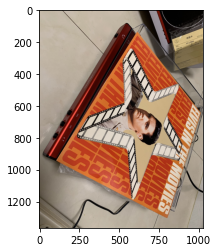

In [ ]:
#原圖
plt.imshow(img)

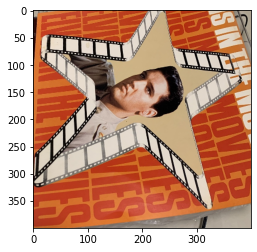

In [ ]:
#轉置矩陣
for i in range(rows):
    for j in range(cols):
        double_y = ((rl[0] * i) + (rl[1] * j) + (rl[2] * i * j) + rl[3])
        double_x = ((rl[4] * i) + (rl[5] * j) + (rl[6] * i * j) + rl[7])
        y = int(double_y)
        x = int(double_x)
        v = (double_y - y)
        u = (double_x - x)
        for idx in range(3):
            r1 = (1 - u) * (1 - v) * img[x, y][idx]
            u1 = u * (1 - v) * img[x + 1, y][idx]
            v1 = v * (1 - u) * img[x, y + 1][idx]
            u2 = u * v * img[x + 1, y + 1][idx]
            rlt = r1 + u1 + v1 + u2
            img_out[i, j][idx] = rlt
plt.imshow(img_out)

#參考網路範例,2D轉3D空間,再轉換回2D

In [ ]:
#讀出原圖
img = read_img('1609399332423.jpg')
plots(img)

In [ ]:
#用小畫家標記四個點,定義轉換出來的大小
original_points_v=[[611,145],[1011,645],[109,945],[803,1301]];
original_points = np.float32(original_points_v)
#填補一個空白矩陣給輸出用
#算出輸出邊界,後面用來定義輸出大小
#上寬
x0=int(np.sqrt(np.sum(np.square(np.array(original_points_v[0])-np.array(original_points_v[1])))))
#下寬
x1=int(np.sqrt(np.sum(np.square(np.array(original_points_v[2])-np.array(original_points_v[3])))))
#左高
x2=int(np.sqrt(np.sum(np.square(np.array(original_points_v[0])-np.array(original_points_v[2])))))
#右高
x3=int(np.sqrt(np.sum(np.square(np.array(original_points_v[1])-np.array(original_points_v[3])))))
dest_size = (min(x0,x1), min(x2,x3))
h,w = dest_size
transformed_points = np.float32([[0,0],[h,0],[0,w],[h,w]])

In [ ]:
def get_coef(a, b, n):
    res = []
    b = [b[0], b[1], 1]
    dim = 3
    for i in range(dim):
        curr = [0] * dim * 4
        curr[i] = a[0]
        curr[dim + i] = a[1]
        curr[2*dim + i] = 1 if i != 2 else 0
        curr[3*dim + n - 1] = -b[i]
        res.append(curr)    
    return res

取得矩陣

In [ ]:
def getPerspectiveTransform(pts1, pts2):
    A = []
    plen = len(pts1)
    for i in range(plen):
        A += get_coef(pts1[i], pts2[i], i)
        
    B = [0, 0, -1] * plen
    C = np.linalg.solve(A, B)
    res = np.ones(9)
    res[:8] = C.flatten()[:8]
    return res.reshape(3,-1).T

矩陣轉換和圖像轉換

In [ ]:
def to_mtx(img):
    H,V,C = img.shape
    mtr = np.zeros((V,H,C), dtype='int')
    for i in range(img.shape[0]):
        mtr[:,i] = img[i]
    
    return mtr

def to_img(mtr):
    V,H,C = mtr.shape
    img = np.zeros((H,V,C), dtype='int')
    for i in range(mtr.shape[0]):
        img[:,i] = mtr[i]
        
    return img

In [ ]:
轉置矩陣

In [ ]:
def warpPerspective(img, M, dsize):
    mtr = to_mtx(img)
    R,C = dsize
    dst = np.zeros((R,C,mtr.shape[2]))
    for i in range(mtr.shape[0]):
        for j in range(mtr.shape[1]):
            res = np.dot(M, [i,j,1])
            i2,j2,_ = (res / res[2] + 0.5).astype(int)
            if i2 >= 0 and i2 < R:
                if j2 >= 0 and j2 < C:
                    dst[i2,j2] = mtr[i,j]
    
    return to_img(dst)

In [ ]:
#先取得矩陣
%%time
M = getPerspectiveTransform(original_points, transformed_points)

CPU times: user 1.54 ms, sys: 985 µs, total: 2.52 ms
Wall time: 2.5 ms


CPU times: user 13.2 s, sys: 32.7 ms, total: 13.2 s
Wall time: 13.3 s


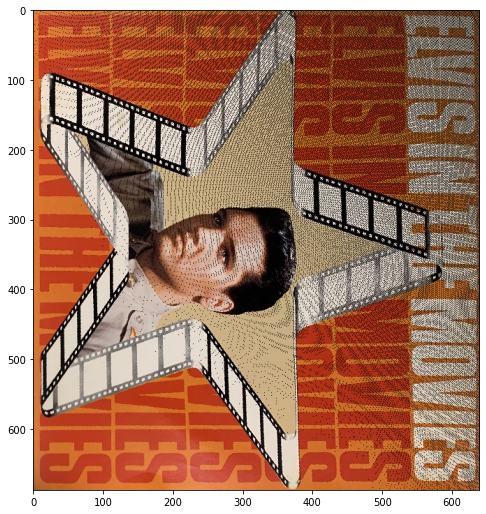

In [ ]:
#進行轉換
%%time
dst = warpPerspective(img, M, destination_size)
plots(dst)

# 使用OpenCV轉換

In [ ]:
%%time
M_cv = cv2.getPerspectiveTransform(original_points, transformed_points)
print(M_cv)

[[ 1.03325942e-01  6.48370283e-02 -7.25335194e+01]
 [-1.72471226e-01  1.37976980e-01  8.53732566e+01]
 [-5.31680267e-04  4.52527479e-05  1.00000000e+00]]
CPU times: user 1.62 ms, sys: 975 µs, total: 2.6 ms
Wall time: 6.3 ms


CPU times: user 14.5 ms, sys: 925 µs, total: 15.4 ms
Wall time: 23.4 ms


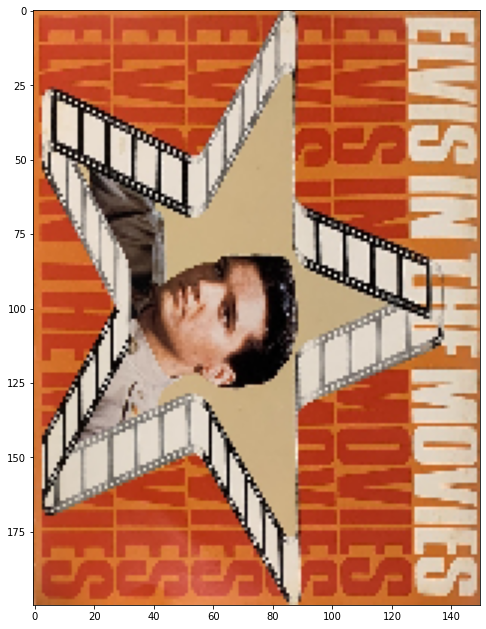

In [ ]:
%%time
dst = cv2.warpPerspective(img, M_cv, destination_size)
plots(dst)